# Import Dependencies

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing Data Set 
df = pd.read_csv("sales_data2.csv_2024-08-31T2221.csv")

# Total Revenue

In [2]:

df['total_revenue'] = df['price'] * df['quantity']
total_revenue = df['total_revenue'].sum()
print("The total revenue is \n", total_revenue)

The total revenue is 
 480.11


# The Average on how much money the client makes per order

In [3]:

unique_order = df['order_id'].nunique()
avg_or_val = total_revenue / unique_order

print("The Average value of an order is :",avg_or_val.round(2))


The Average value of an order is : 68.59


# Quantity Sold Per Product 


In [4]:
sales = df.groupby('product_id')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=True)
print("The total quantity sold per product is: \n", sales)

The total quantity sold per product is: 
    product_id  quantity
3         204         1
5         206         1
2         203         2
4         205         2
1         202         3
6         207         4
7         208         5
0         201         8


# 5 Best Selling Products
Based on quantity sold

In [11]:
top_five = sales.sort_values(by='quantity', ascending=False).head(5)
print(top_five)

   product_id  quantity
0         201         8
7         208         5
6         207         4
1         202         3
2         203         2


# Top Five Products Sold

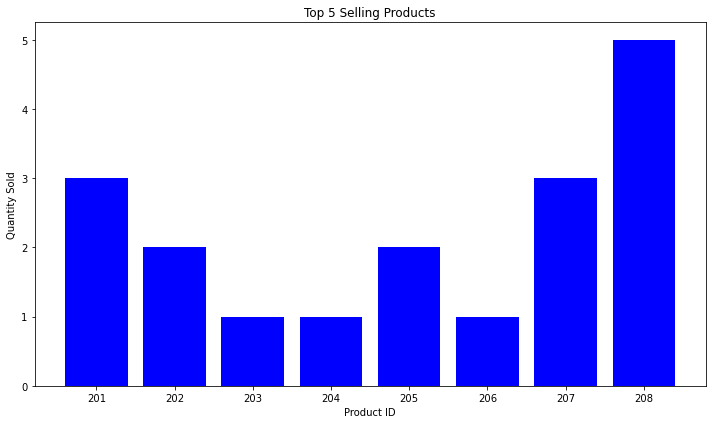

In [17]:
# Top Five
plt.figure(figsize=(10,6))
plt.bar(df['product_id'], df['quantity'], color='blue')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title('Top 5 Selling Products')
plt.tight_layout()
plt.show()

# Daily Sales Revenue

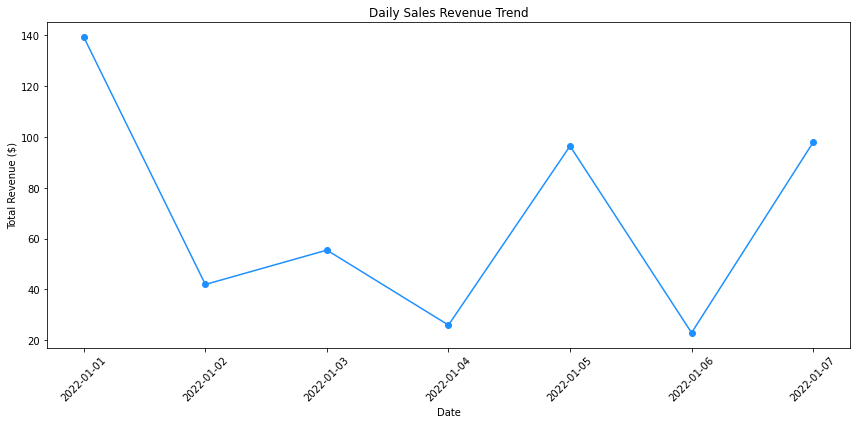

In [14]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
daily_sales = df.groupby(df['date'].dt.date)['total_revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_sales['date'], daily_sales['total_revenue'], marker='o', color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.title('Daily Sales Revenue Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()